In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
boston = load_boston()
bos = pd.DataFrame(boston.data)
bos.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [37]:
bos.columns = boston.feature_names

In [38]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [39]:
bos['PRICE'] = boston.target
Y = bos['PRICE']
X = bos.drop('PRICE', axis=1)

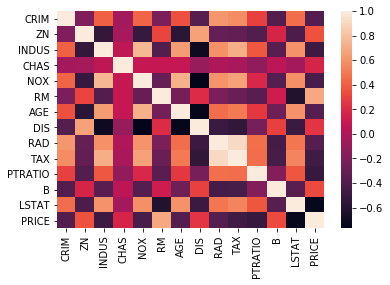

In [65]:
import seaborn as sns
corr = bos.corr() 
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.33, random_state=5)

In [41]:
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [59]:
pred = lm.predict(X_test)
print(pred)


[37.46723562 31.39154701 27.1201962   6.46843347 33.62966737  5.67067989
 27.03946671 29.92704748 26.35661334 22.45246021 32.20504441 21.78641653
 23.41138441 33.60894362 28.28619511 15.13859055  0.30087325 18.71850376
 14.4706712  11.10823598  2.69494197 19.21693734 38.41159345 24.36936442
 31.61493439 11.42210397 24.92862188 23.31178043 22.7764079  20.65081211
 16.035198    7.07978633 17.65509209 22.81470561 29.21943405 18.61354566
 28.37701843  8.80516873 41.65140459 34.02910176 20.1868926   3.95600857
 29.69124564 12.18081256 27.19403498 30.63699231 -6.24952457 19.9462404
 21.55123979 13.36478173 20.39068171 19.87353324 23.57656877 13.40141285
 17.66457201 24.77424747 35.31476509 15.48318159 28.50764575 21.72575404
 20.58142839 26.08460856 14.51816968 32.37494056 20.80917392 12.18932524
 19.45551285 25.23390429 21.77302317 21.30227044 20.58222113 26.74635016
 17.53006166 18.7191946  19.03026793 25.76553031 21.8757557  15.70891861
 35.12411848 18.04488652 22.43612549 39.4000555  22.

In [61]:
# cost function 
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test,pred)
print('MEAN SQUARED ERROR: {}'.format(mse))
print('Squared mean error : {}'.format(np.sqrt(mse)))

MEAN SQUARED ERROR: 28.530458765974583
Squared mean error : 5.341391089030514


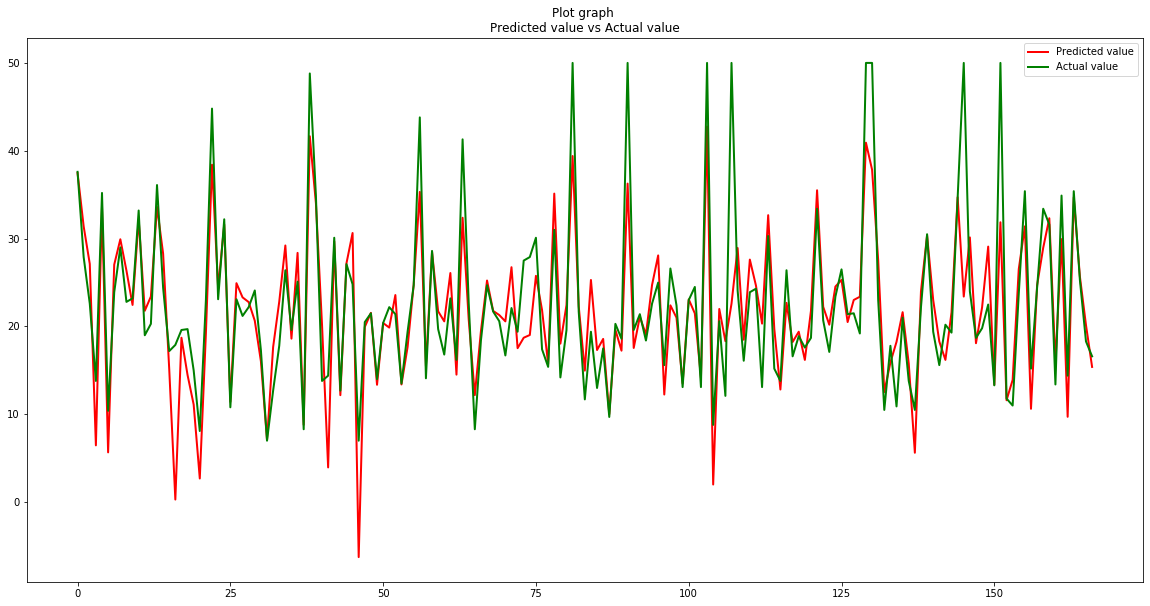

In [69]:
plt.figure(figsize=(20,10))
plt.plot([x for x in range(len(pred))],pred, label ='Predicted value', color='red',linewidth=2)
plt.plot([x for x in range(len(pred))],Y_test,label='Actual value', color='green',linewidth=2)
plt.title('Plot graph \nPredicted value vs Actual value')
plt.legend()
plt.show()
